In [1]:
import numpy as np
import matplotlib.pyplot as plt

$x_{i}$ = −2 + 0.2 𝑖      $\;\;\;\;\;\;$           𝑖 = 0,1, … ,20 <br>
$x_{j}$ = −2 + 0.2 𝑗      $\;\;\;\;\;\;$           𝑗 =  0,1, … ,20 

In [2]:
##Preparing the input data
X = np.empty((1,3), int)
for i in range(21):
    for j in range(21):
        a,b = np.round(-2 + 0.2*i,2), np.round(-2 + 0.2*j,2)
        label = -1 if a**2+b**2 > 1 else 1 ##Defining the labels
        X = np.append(X , [[a,b,label]], 0)
X = np.delete(X,0,0)
print(X.shape)

(441, 3)


In [3]:
Y = X #checkpointing for reuse
print(Y)

[[-2.  -2.  -1. ]
 [-2.  -1.8 -1. ]
 [-2.  -1.6 -1. ]
 ...
 [ 2.   1.6 -1. ]
 [ 2.   1.8 -1. ]
 [ 2.   2.  -1. ]]


In [4]:
##shuffling data
np.random.shuffle(X)
##Separating data points and labels
X_data = X[:,0:2]
y = X[:,-1:]
##Splitting into test and train dataset 20-80
X_train, X_test = X_data[:393,:], X_data[393:,:]
y_train, y_test = y[:393,:], y[393:,:]

In [5]:
##Standardizing data ##It is not required as accuracy is lowered using it
X_train_std = (X_train - X_train.mean()) / (X_train.std())
X_test_std = (X_test - X_test.mean()) / (X_test.std())

##Replacing NaN values with zero
#X_train_std = X_train_std.fillna(0)
#X_test_std = X_test_std.fillna(0)


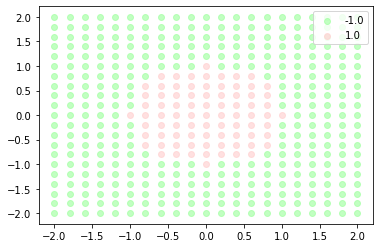

In [5]:
##Printing the graph for visualization. This is the entire dataset.
cdict = {1: '#ffcccc', -1: '#99ff99'}
fig, ax = plt.subplots()
for g in np.unique(X[:,2]):
    ix = np.where(X[:,2] == g)
    ax.scatter(X[:,0][ix], X[:,1][ix], c = cdict[g], label = g, alpha =0.6)
ax.legend()
plt.show()

# Choosing all training set points as centers

In [6]:
centers = X_train
centers.shape

(393, 2)

In [7]:
def calculate_sigma(): ##This function is not required, just debugging and getting approximate value
    max=0 
    for i in range(centers.shape[0]):
        for j in range(centers.shape[0]):
            d= np.linalg.norm(centers[i]-centers[j])
            if(d> max):
                max= d
    d= max
    return(d/np.sqrt(2*centers.shape[0]))


##Function for G matrix
def interpolation_matrix(X):
    row= X.shape[0]
    column= centers.shape[0]
    G = np.empty((row,column), dtype= float)
    for i in range(row):
        for j in range(column):
            distance = np.linalg.norm(X[i]-centers[j])
            G[i][j] = np.exp(-(distance)**2/(2 * sigma**2))
            #G[i][j] = np.exp(-1 / (2 * sigma**2) * (distance)**2)
            #G[i][j] = np.exp(-math.pow(distance,2)/math.pow(2*sigma,2))
            
    return G


#Defining accuracy function that gives the number of correctly predicted outputs as well as accuracy
def accuracy(y_pred,y_test):
    return np.count_nonzero(y_pred==y_test),(np.count_nonzero(y_pred==y_test)/y_test.shape[0])*100


#Function to calculate mean square error
def mean_square_error(y_pred, y_test):
    return np.square(np.subtract(y_test,y_pred)).mean()


#Function that plots the graph
def plot_graph(a, y_pred, y_actual):
    cdict = {1: '#ffcccc', -1: '#99ff99'}##change
    fig, ax = plt.subplots()
    for g in np.unique(y_pred[:,0]):
        ix = np.where(y_pred[:,0] == g)
        ax.scatter(a[:,0][ix], a[:,1][ix], c = cdict[g], label = g, alpha =0.9)
        
    ##plotting incorrectly detected outputs
    incorrect_idx = np.where(y_pred[:,0] != y_actual[:,0])
    ax.scatter(a[:,0][incorrect_idx], a[:,1][incorrect_idx],c ="red", label="Incorrect detection",
                   marker='^', alpha =0.6)
    ax.legend()
    plt.show()

In [8]:
sigma_values = [0.1, 0.2, 0.3, 0.4, 0.7, 0.9, 1.0] ##Varying the spread parameter

## Testing accuracy

For Sigma :  0.1 -----------------
Accuraccy : (47, 97.91666666666666)
MSE : 0.08333333333333333


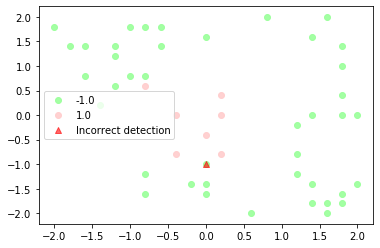

For Sigma :  0.2 -----------------
Accuraccy : (46, 95.83333333333334)
MSE : 0.16666666666666666


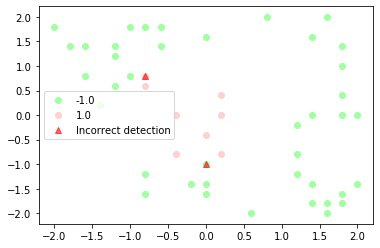

For Sigma :  0.3 -----------------
Accuraccy : (34, 70.83333333333334)
MSE : 1.1666666666666667


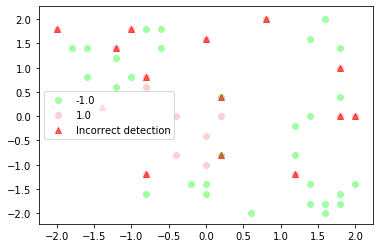

For Sigma :  0.4 -----------------
Accuraccy : (33, 68.75)
MSE : 1.25


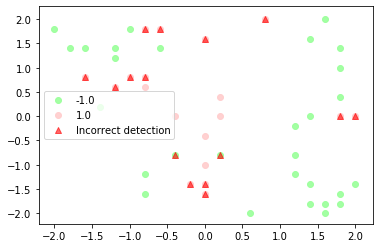

For Sigma :  0.7 -----------------
Accuraccy : (26, 54.166666666666664)
MSE : 1.8333333333333333


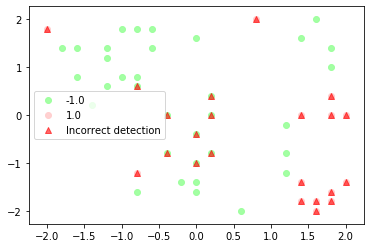

For Sigma :  0.9 -----------------
Accuraccy : (25, 52.083333333333336)
MSE : 1.9166666666666667


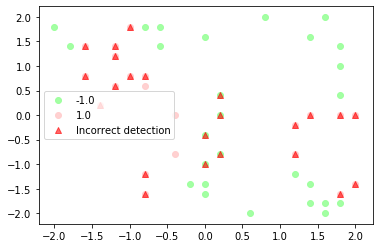

For Sigma :  1.0 -----------------
Accuraccy : (28, 58.333333333333336)
MSE : 1.6666666666666667


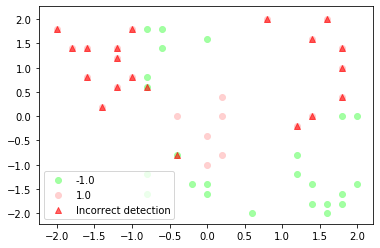

In [9]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_test = interpolation_matrix(X_test) ##For testing accuracy
    prediction= np.dot(G_test,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_test)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_test)) ## Prints mean square error
    
    plot_graph(X_test, y_pred, y_test)
    
   

## For training accuracy

For Sigma :  0.1 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


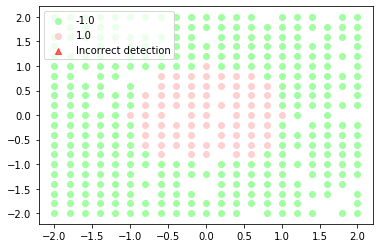

For Sigma :  0.2 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


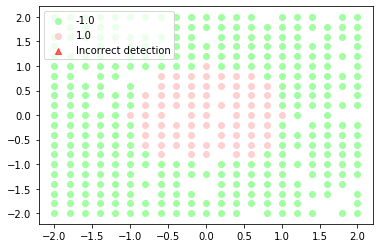

For Sigma :  0.3 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


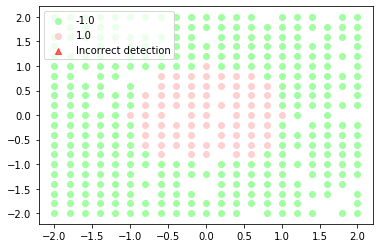

For Sigma :  0.4 -----------------
Accuraccy : (287, 73.02798982188295)
MSE : 1.078880407124682


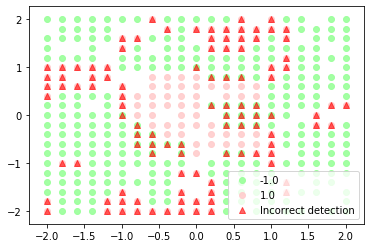

For Sigma :  0.7 -----------------
Accuraccy : (190, 48.346055979643765)
MSE : 2.0661577608142494


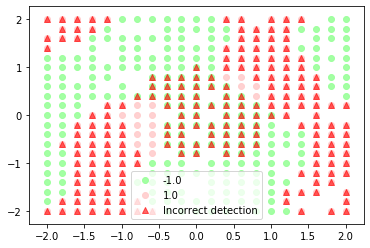

For Sigma :  0.9 -----------------
Accuraccy : (162, 41.221374045801525)
MSE : 2.351145038167939


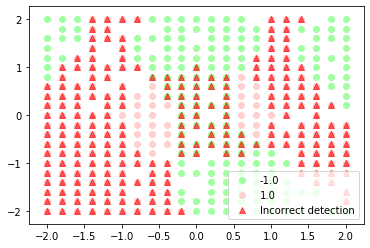

For Sigma :  1.0 -----------------
Accuraccy : (237, 60.30534351145038)
MSE : 1.5877862595419847


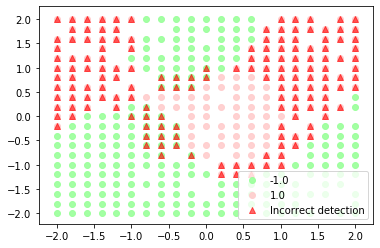

In [10]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_train = interpolation_matrix(X_train) ##For training accuracy
    prediction= np.dot(G_train,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_train)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_train)) ## Prints mean square error
    
    plot_graph(X_train, y_pred, y_train)
   

In case of testing accuracy, it is observed that spread parameter affects the accuracy, and hence the mean square error (MSE). It is observed that at sigma = 0.1 and sigma = 0.2, accuracy obtained is highest, and as the value of sigma increases, MSE increases, and hence the overall accuracy decreases. From the above graph, it could be clearly seen number of wrongly predicted labels with different values of sigma. More and more neighbourhood is affected with increasing sigma, and decreasing accuracy.<br>
The same applies for training accuracy. Highest accuracy and least mean square error is obtained at sigma = 0.1 and 0.2, but gradually MSE increases with increasing value of sigma. sigma value is proportional to the maximum distance between the chosen centers, and with increasing distance, the clusters merges among themselves leading to incorrect prediction as can be seen from the graphs above.

In [22]:
##For individual values of sigma

In [ ]:
##Debugging
comparison = G1 == G
print(comparison.all())

# Choosing 150 centers randomly from training set

In [24]:
random_indices = np.random.choice(393, size = 150, replace=False)
centers = X_train[random_indices, :]

## For testing accuracy

For Sigma :  0.1 -----------------
Accuraccy : (47, 97.91666666666666)
MSE : 0.08333333333333333


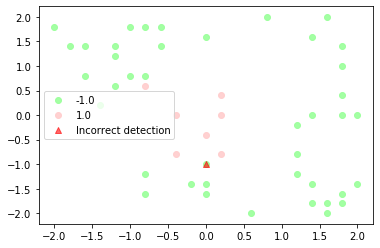

For Sigma :  0.2 -----------------
Accuraccy : (46, 95.83333333333334)
MSE : 0.16666666666666666


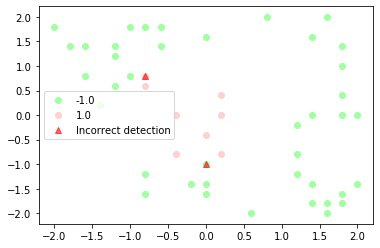

For Sigma :  0.3 -----------------
Accuraccy : (34, 70.83333333333334)
MSE : 1.1666666666666667


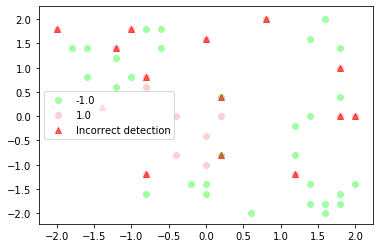

For Sigma :  0.4 -----------------
Accuraccy : (33, 68.75)
MSE : 1.25


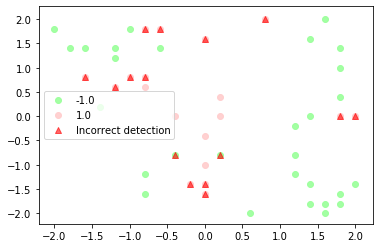

For Sigma :  0.7 -----------------
Accuraccy : (26, 54.166666666666664)
MSE : 1.8333333333333333


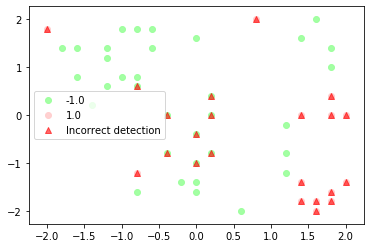

For Sigma :  0.9 -----------------
Accuraccy : (25, 52.083333333333336)
MSE : 1.9166666666666667


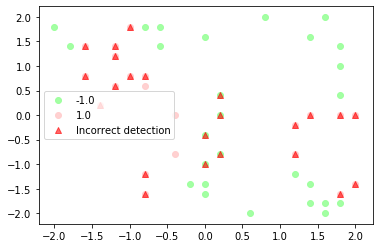

For Sigma :  1.0 -----------------
Accuraccy : (28, 58.333333333333336)
MSE : 1.6666666666666667


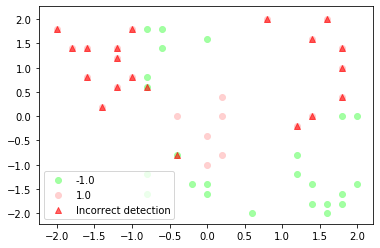

In [12]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_test = interpolation_matrix(X_test) ##For testing accuracy
    prediction= np.dot(G_test,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_test)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_test)) ## Prints mean square error
    
    plot_graph(X_test, y_pred, y_test)
    

## For training accuracy

For Sigma :  0.1 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


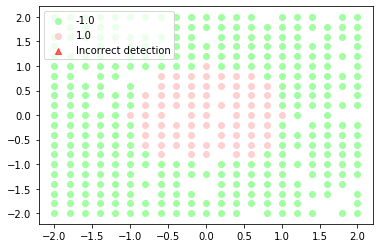

For Sigma :  0.2 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


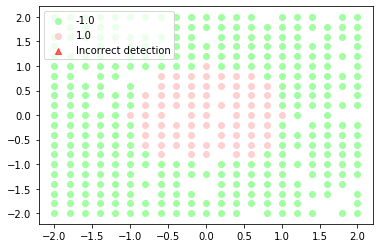

For Sigma :  0.3 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


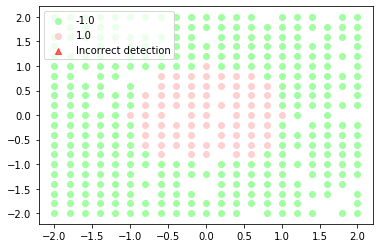

For Sigma :  0.4 -----------------
Accuraccy : (287, 73.02798982188295)
MSE : 1.078880407124682


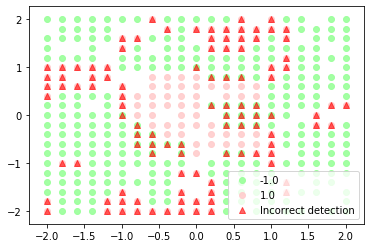

For Sigma :  0.7 -----------------
Accuraccy : (190, 48.346055979643765)
MSE : 2.0661577608142494


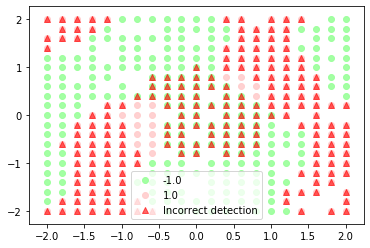

For Sigma :  0.9 -----------------
Accuraccy : (162, 41.221374045801525)
MSE : 2.351145038167939


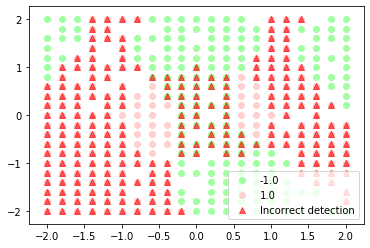

For Sigma :  1.0 -----------------
Accuraccy : (237, 60.30534351145038)
MSE : 1.5877862595419847


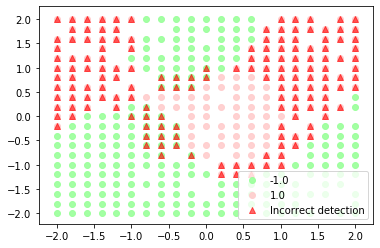

In [11]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_train = interpolation_matrix(X_train) ##For training accuracy
    prediction= np.dot(G_train,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_train)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_train)) ## Prints mean square error
    
    plot_graph(X_train, y_pred, y_train)
    

When 150 centers are choosen randomly from the training set, MSE is almost the same as obtained using all the training dataset as centers. Again, as the value of sigma increases, accuracy decreases and MSE increases.

# Using k-means to find the clusters

In [35]:
from sklearn.cluster import KMeans

km= KMeans(n_clusters= 150, max_iter= 100)
km.fit(X_train)
centers = km.cluster_centers_

## For testing accuracy

For Sigma :  0.1 -----------------
Accuraccy : (47, 97.91666666666666)
MSE : 0.08333333333333333


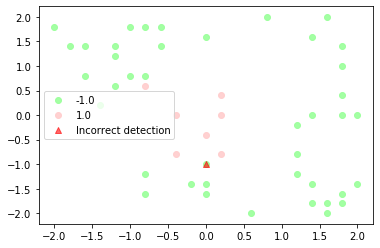

For Sigma :  0.2 -----------------
Accuraccy : (46, 95.83333333333334)
MSE : 0.16666666666666666


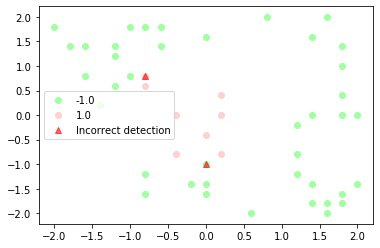

For Sigma :  0.3 -----------------
Accuraccy : (34, 70.83333333333334)
MSE : 1.1666666666666667


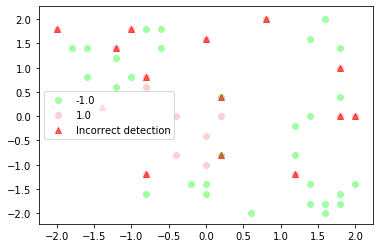

For Sigma :  0.4 -----------------
Accuraccy : (33, 68.75)
MSE : 1.25


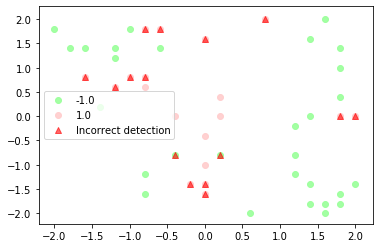

For Sigma :  0.7 -----------------
Accuraccy : (26, 54.166666666666664)
MSE : 1.8333333333333333


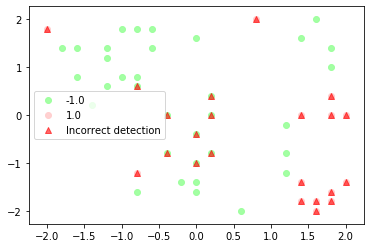

For Sigma :  0.9 -----------------
Accuraccy : (25, 52.083333333333336)
MSE : 1.9166666666666667


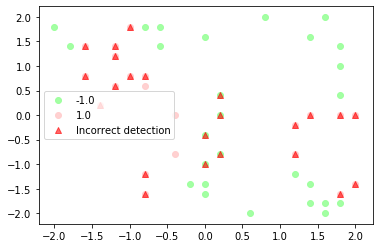

For Sigma :  1.0 -----------------
Accuraccy : (28, 58.333333333333336)
MSE : 1.6666666666666667


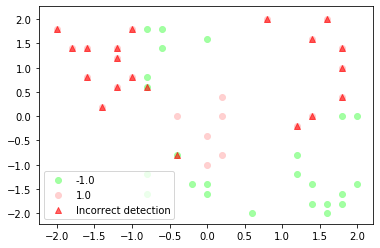

In [13]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_test = interpolation_matrix(X_test) ##For testing accuracy
    prediction= np.dot(G_test,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_test)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_test)) ## Prints mean square error
    
    plot_graph(X_test, y_pred, y_test)
    

## For training accuracy

For Sigma :  0.1 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


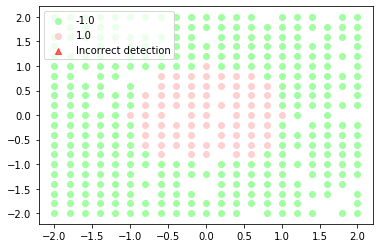

For Sigma :  0.2 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


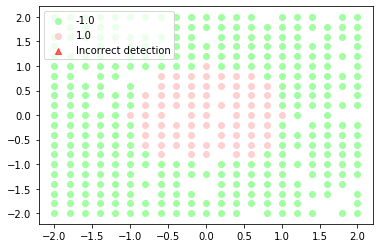

For Sigma :  0.3 -----------------
Accuraccy : (393, 100.0)
MSE : 0.0


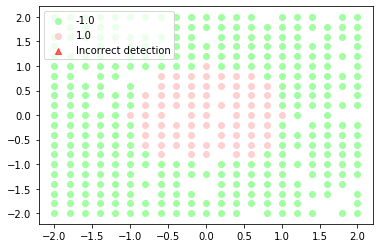

For Sigma :  0.4 -----------------
Accuraccy : (287, 73.02798982188295)
MSE : 1.078880407124682


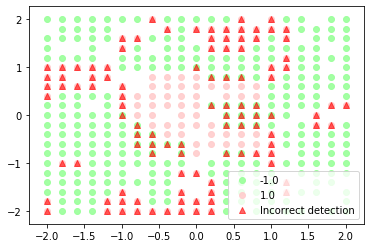

For Sigma :  0.7 -----------------
Accuraccy : (190, 48.346055979643765)
MSE : 2.0661577608142494


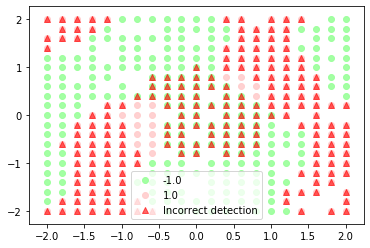

For Sigma :  0.9 -----------------
Accuraccy : (162, 41.221374045801525)
MSE : 2.351145038167939


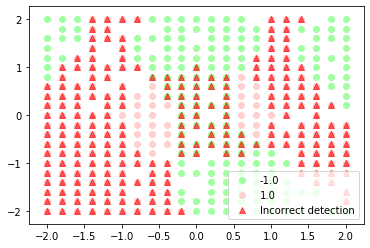

For Sigma :  1.0 -----------------
Accuraccy : (237, 60.30534351145038)
MSE : 1.5877862595419847


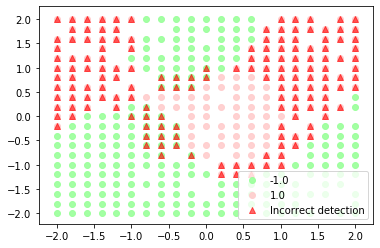

In [15]:
for sigma in sigma_values:
    G= interpolation_matrix(X_train)
    
    ##Calculating pseudo inverse and then weights
    GTG= np.dot(G.T,G)
    GTG_inv= np.linalg.inv(GTG)
    fac= np.dot(GTG_inv,G.T)
    W= np.dot(fac,y_train)
    #print(W.shape)
    
    G_train = interpolation_matrix(X_train) ##For training accuracy
    prediction= np.dot(G_train,W)
    
    y_pred= np.sign(prediction) ##For other values of sigma-0.1, 0.2, 0.3, 0.4 and 0.5
    
    print("For Sigma : ",sigma, "-----------------")
    print("Accuraccy :" , accuracy(y_pred,y_train)) ## Accuracy gives us two things- actual accuracy as
    ##well as number of correctly obtained outputs
    print("MSE :" , mean_square_error(y_pred, y_train)) ## Prints mean square error
    
    plot_graph(X_train, y_pred, y_train)
    

When k-means clustering is used, again the training and testing accuracy obtained is almost same. Training accuracy in these cases is slightly higher as the above two cases. Overall, if accuracy is to be compared, by using all three cases, it is almost the same and varies slighly with sigma in each of the three cases. Training accuracy obtained is highest at sigma = 0.1 and 0.2 in all three cases, and sharps abruptly at sigma = 0.3. However training accuracy is highest at sigma = 0.1, 0.2, 0.3 and drops sharply ~70% at sigma = 0.4. But the time taken by clustering algorithm is more than the other two cases.

Sources: <br>
https://www.hackerearth.com/blog/developers/radial-basis-function-network/<br>
https://github.com/oarriaga/RBF-Network/blob/master/RBFN.py